# Exerise sheet 4, Task 3

## Import the necessary libraries

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## Define the Andronov-Hopf bifurcation

In [2]:
def f(x, t, alpha):
        x1, x2 = x
        dx1 = alpha*x1 - x2 - x1*(x1**2 + x2**2)
        dx2 = x1 + alpha*x2 - x2*(x1**2 + x2**2)
        return [dx1, dx2]

## Define function to generate phase portraits using alpha values

In [3]:
def plot_phase_portrait(alphas):
    """ Plot phase portraits of the Andronov-Hopf bifurcation using several alpha values.

    Args:
        alphas (list): Different alpha values.
    """
    for alpha in alphas:
        x1range = np.linspace(-2, 2, 20)
        x2range = np.linspace(-2, 2, 20)
        
        X1, X2 = np.meshgrid(x1range, x2range)
        
        DX1, DX2 = f([X1, X2], 0, alpha)
        DX1 = DX1 / np.sqrt(DX1**2 + DX2**2)
        DX2 = DX2 / np.sqrt(DX1**2 + DX2**2)
        
        # Plot the phase portrait
        plt.quiver(X1, X2, DX1, DX2)
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.title("alpha = "+str(alpha))
        plt.show()

## Visualize the bifurcation of the system by plotting three phase diagrams.

In [4]:
# Define alpha values
alphas = [-1,0,1]

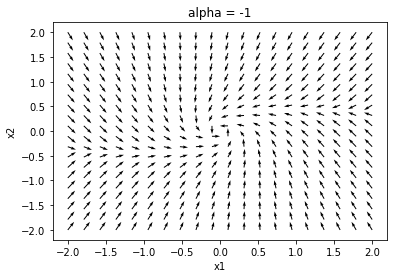

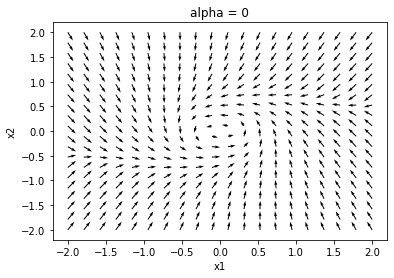

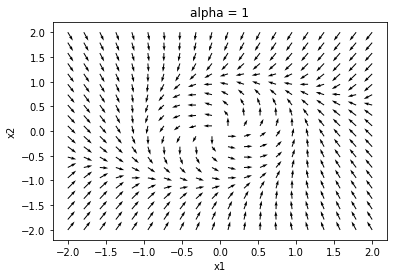

In [5]:
plot_phase_portrait(alphas)

## For alpha = 1, numerically compute and visualize two orbits of the system

In [6]:
def plot_orbits(alpha, starting_point):
    """Compute and visualize two orbits of the Andronov-Hopf bifurcation 
       for the given alpha value and starting point.

    Args:
        alpha (int): Alpha value.
        starting_point (list): Starting point.
    """
    # Set the range of t values to use for integration
    t = np.linspace(0, 10, 100)
    
    # Integrate the solutions
    x = odeint(f, starting_point, t, args=(alpha,))
    
    # Extract the x1 and x2 values from the solution
    x1 = x[:,0]
    x2 = x[:,1]
    
    x1range = np.linspace(-2, 2, 20)
    x2range = np.linspace(-2, 2, 20)
    
    # Create a grid of points in the x1-x2 plane
    X1, X2 = np.meshgrid(x1range, x2range)

    # Evaluate the derivative of x1 and x2 at each point in the grid
    DX1, DX2 = f([X1, X2], 0, alpha)
    
    DX1 = DX1 / np.sqrt(DX1**2 + DX2**2)
    DX2 = DX2 / np.sqrt(DX1**2 + DX2**2)
    
    # Plot the phase portrait and vector field
    plt.plot(x1, x2, 'b-')
    plt.quiver(X1, X2, DX1, DX2)
    # Plot the phase portrait
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title("alpha = "+str(alpha))
    plt.show()

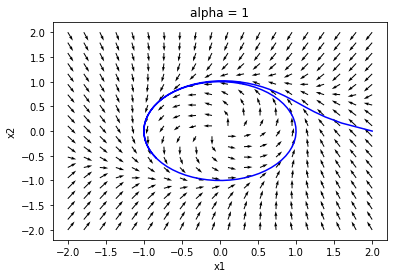

In [7]:
alpha = 1
starting_point_1 = [2,0]
plot_orbits(alpha, starting_point_1)

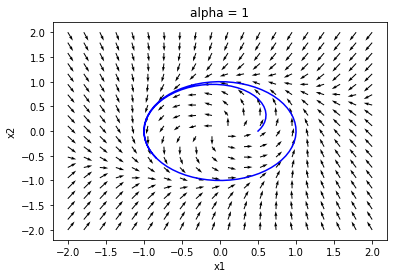

In [8]:
starting_point_2 = [0.5,0]
plot_orbits(alpha, starting_point_2)

## Visualize the cusp bifurcation

In [9]:
# Set up the parameters for the bifurcation surface
alpha2 = np.linspace(-5, 5, 100)
x = np.linspace(-5, 5, 100)

pointalpha, pointalpha2, pointx = [], [], []

In [10]:
for x0 in x:
    for alpha2_0 in alpha2:
        alpha1_0 = x0**3 - x0*alpha2_0
        pointalpha.append(alpha1_0)
        pointalpha2.append(alpha2_0)
        pointx.append(x0)

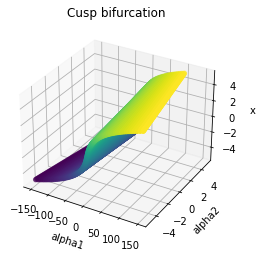

In [11]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pointalpha, pointalpha2, pointx, cmap="viridis", c=pointx)

# Set the axis labels
ax.set_xlabel('alpha1')
ax.set_ylabel('alpha2')
ax.set_zlabel('x')

# Show the plot
plt.title("Cusp bifurcation")
plt.show()